In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from collections import Counter

"""
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
"""

In [7]:
"""
 Loading dataset
"""
df = pd.read_csv('../lld_total_labeled_dnscat.csv', encoding='utf-8')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [8]:
print("[*] Adding features")
"""
Shannon Entropy calulation
"""
def calcEntropy(x):
    p, lens = Counter(x), np.float(len(x))
    return -sum( count/lens * np.log2(count/lens) for count in p.values())

df['entropy'] = [calcEntropy(x) for x in df['lld']]

"""
LLD record length
"""
df['length'] = [len(x) for x in df['lld']]


"""

 Number of different characters

"""
def countChar(x):
    charsum = 0
    total = len(x)
    for char in x:
        if not char.isalpha():
            charsum = charsum + 1
    return float(charsum)/total
df['numbchars'] = [countChar(x) for x in df['lld']]

"""
Number of . in subdomain
"""
df['numbdots'] = [x.count('.') for x in df['lld']]

"""
Number of character in subdomain
"""
df['numunique'] = [len(set(x)) for x in df['lld']]



[*] Adding features


In [9]:

"""

    Build models

"""
models = []
models.append(('NN',MLPClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


#
x = df.drop(['label','lld'], axis=1)
y = df['label']
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=1)



[*]evaluate each model in turn


/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perc

NN: 0.999512 (0.001463)
LR: 0.987327 (0.004980)
KNN: 0.996102 (0.001949)
DT: 0.998049 (0.003236)
NB: 0.973199 (0.007929)
SVM: 0.992205 (0.003230)


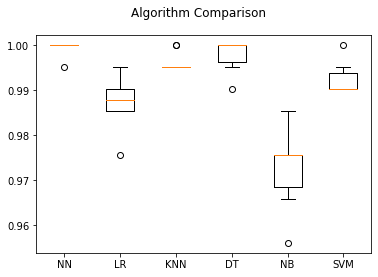

In [10]:
print('[*]evaluate each model in turn')
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()